In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# DataSet 19

In [153]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book19.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1932,EAST RAJASTHAN,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8,412.5,30.5,8.5,362.9,10.6
1,1933,EAST RAJASTHAN,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8,578.3,4.8,11.7,544.5,17.2
2,1934,EAST RAJASTHAN,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0,686.1,2.7,14.2,651.4,17.8
3,1935,EAST RAJASTHAN,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7,694.5,9.8,49.4,613.3,22.0
4,1936,EAST RAJASTHAN,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6,279.8,12.8,6.8,259.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2042,EAST RAJASTHAN,2011,0.0,11.2,0.2,0.5,5.1,140.9,193.6,284.1,166.4,0.0,0.0,0.0,802.1,11.2,5.9,784.9,0.0
111,2043,EAST RAJASTHAN,2012,1.9,0.0,0.0,3.6,9.5,11.2,170.5,365.0,131.3,0.5,0.0,0.1,693.6,1.9,13.1,678.0,0.6
112,2044,EAST RAJASTHAN,2013,1.4,21.7,0.4,3.2,1.0,90.6,319.0,278.5,88.0,30.6,1.3,0.3,836.1,23.1,4.6,776.1,32.2
113,2045,EAST RAJASTHAN,2014,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,683.3,38.4,22.1,618.4,4.4


In [154]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [155]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1932,EAST RAJASTHAN,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8,412.5,30.5,8.5,362.9,10.6
1,1933,EAST RAJASTHAN,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8,578.3,4.8,11.7,544.5,17.2
2,1934,EAST RAJASTHAN,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0,686.1,2.7,14.2,651.4,17.8
3,1935,EAST RAJASTHAN,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7,694.5,9.8,49.4,613.3,22.0
4,1936,EAST RAJASTHAN,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6,279.8,12.8,6.8,259.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2042,EAST RAJASTHAN,2011,0.0,11.2,0.2,0.5,5.1,140.9,193.6,284.1,166.4,0.0,0.0,0.0,802.1,11.2,5.9,784.9,0.0
111,2043,EAST RAJASTHAN,2012,1.9,0.0,0.0,3.6,9.5,11.2,170.5,365.0,131.3,0.5,0.0,0.1,693.6,1.9,13.1,678.0,0.6
112,2044,EAST RAJASTHAN,2013,1.4,21.7,0.4,3.2,1.0,90.6,319.0,278.5,88.0,30.6,1.3,0.3,836.1,23.1,4.6,776.1,32.2
113,2045,EAST RAJASTHAN,2014,28.4,10.0,6.4,7.3,8.4,23.5,197.1,261.0,136.9,3.2,0.0,1.1,683.3,38.4,22.1,618.4,4.4


<AxesSubplot:>

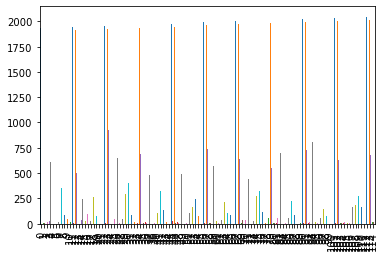

In [156]:
b.plot.bar(legend=None)

<AxesSubplot:>

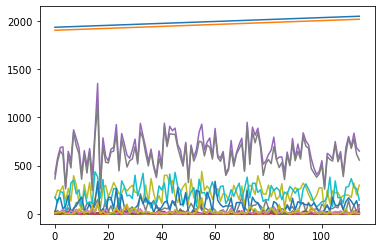

In [157]:
b.plot.line(legend=None)

<AxesSubplot:>

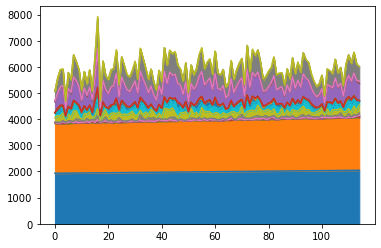

In [158]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

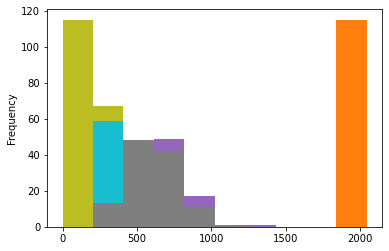

In [159]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='YEAR'>

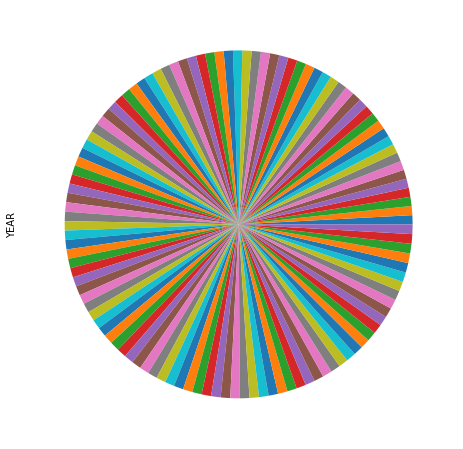

In [160]:
b.plot.pie(y='YEAR',figsize=(8,8),labels=None,legend=None)

# DataSet 20

In [161]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book20.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1,1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
2,1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
3,1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
4,1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1927,WEST RAJASTHAN,2011,0.0,11.8,1.5,1.5,7.8,24.4,88.5,166.8,116.3,0.1,0.0,0.0,418.7,11.8,10.7,396.1,0.1
111,1928,WEST RAJASTHAN,2012,0.5,0.0,0.0,9.5,10.4,5.3,40.4,166.7,92.0,1.9,0.0,0.6,327.3,0.5,19.9,304.3,2.5
112,1929,WEST RAJASTHAN,2013,8.6,21.8,4.2,3.1,1.7,37.6,104.5,138.2,58.7,10.1,1.0,0.0,389.4,30.4,8.9,339.0,11.1
113,1930,WEST RAJASTHAN,2014,0.8,2.2,4.7,8.4,23.0,13.8,94.3,69.6,84.9,0.5,0.2,0.0,302.4,3.0,36.0,262.6,0.7


In [162]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

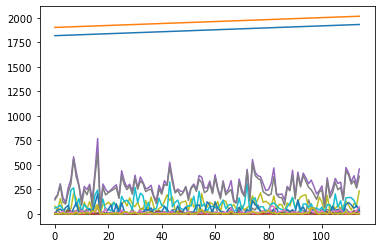

In [163]:
a.plot.line(legend=None)

<AxesSubplot:>

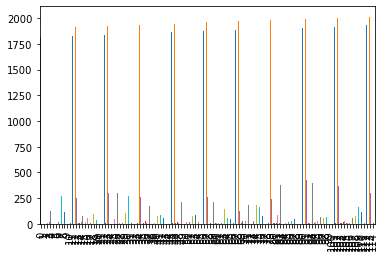

In [164]:
a.plot.bar(legend=None)

<AxesSubplot:>

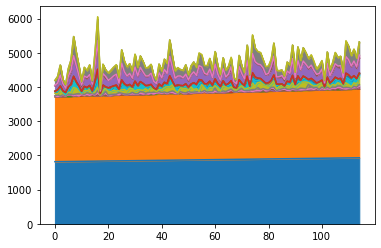

In [165]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

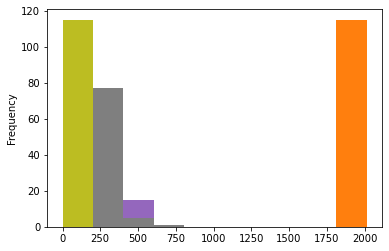

In [166]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAY'>

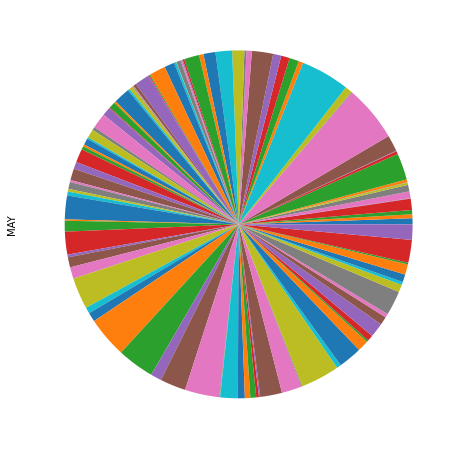

In [167]:
a.plot.pie(y='MAY',figsize=(8,8),labels=None,legend=None)

# DataSet 21

In [168]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book21.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1702,JAMMU & KASHMIR,1901,66.4,69.3,69.6,132.2,105.8,53.4,171.7,181.3,101.8,24.1,0.0,4.4,979.9,135.6,307.6,508.2,28.5
1,1703,JAMMU & KASHMIR,1902,6.5,9.7,91.3,100.5,70.7,113.3,108.4,136.9,62.2,15.1,44.0,1.8,760.5,16.2,262.5,420.9,60.9
2,1704,JAMMU & KASHMIR,1903,96.2,21.5,238.6,58.7,57.3,18.9,332.5,218.6,176.9,10.7,15.0,41.8,1286.6,117.7,354.6,746.9,67.5
3,1705,JAMMU & KASHMIR,1904,110.6,17.3,145.2,64.5,67.8,25.9,182.3,132.2,62.3,50.0,24.8,99.2,982.2,128.0,277.5,402.7,174.0
4,1706,JAMMU & KASHMIR,1905,146.7,76.3,161.4,71.7,65.2,43.3,145.2,111.5,239.7,5.8,0.6,90.2,1157.7,223.0,298.4,539.7,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1812,JAMMU & KASHMIR,2011,43.4,211.6,97.8,89.0,32.4,72.5,81.6,131.2,72.0,19.4,12.9,23.8,887.6,254.9,219.2,357.3,56.1
111,1813,JAMMU & KASHMIR,2012,150.9,95.8,45.2,86.6,48.9,32.6,118.8,264.9,106.7,15.7,10.8,57.8,1034.7,246.7,180.7,523.0,84.3
112,1814,JAMMU & KASHMIR,2013,52.2,136.4,41.9,47.4,47.4,80.5,125.1,219.1,41.2,34.4,13.4,20.3,859.3,188.6,136.7,465.8,68.1
113,1815,JAMMU & KASHMIR,2014,75.8,64.0,153.1,76.1,52.7,25.3,100.5,134.6,362.8,32.2,14.1,2.3,1093.4,139.8,281.9,623.2,48.5


In [169]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          114 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          114 non-null    float64
 14  DEC          114 non-null    float64
 15  ANNUAL       114 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      114 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

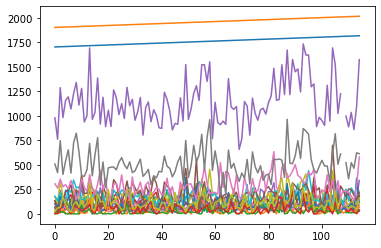

In [170]:
a.plot.line(legend=None)

<AxesSubplot:>

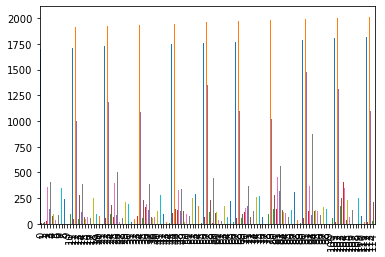

In [171]:
a.plot.bar(legend=None)

<AxesSubplot:>

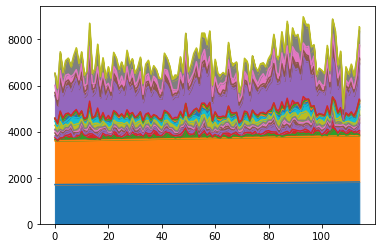

In [172]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

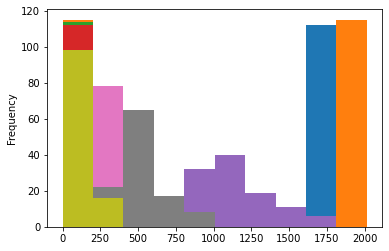

In [173]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='FEB'>

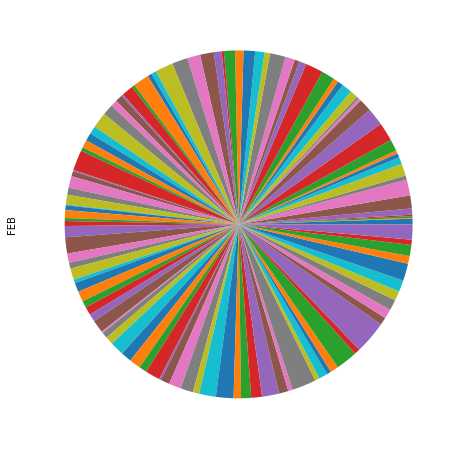

In [174]:
a.plot.pie(y='FEB',figsize=(8,8),labels=None,legend=None)

# DataSet 22

In [176]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book22.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1587,HIMACHAL PRADESH,1901,137.8,174.5,75.0,19.2,89.6,32.7,280.5,459.7,53.0,3.9,0.0,19.1,1345.1,312.3,183.8,825.9,23.0
1,1588,HIMACHAL PRADESH,1902,6.5,27.0,104.4,76.2,61.3,78.8,258.6,199.3,113.4,23.6,2.5,0.0,951.6,33.6,241.9,650.0,26.1
2,1589,HIMACHAL PRADESH,1903,76.5,21.4,213.7,25.4,54.7,32.2,157.7,256.5,107.9,5.8,0.2,41.4,993.3,97.9,293.7,554.2,47.4
3,1590,HIMACHAL PRADESH,1904,79.3,22.4,131.7,48.0,90.3,33.1,241.1,184.3,56.4,51.6,17.3,32.0,987.6,101.7,270.0,515.0,100.9
4,1591,HIMACHAL PRADESH,1905,81.3,76.8,160.2,39.3,50.4,43.6,191.1,132.8,119.1,0.3,0.9,34.4,930.2,158.1,249.8,486.6,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1697,HIMACHAL PRADESH,2011,43.9,97.4,49.7,62.4,45.1,118.3,177.7,380.2,120.3,6.0,0.3,6.9,1108.3,141.3,157.3,796.6,13.2
111,1698,HIMACHAL PRADESH,2012,92.3,51.3,28.4,55.9,9.4,31.1,241.5,280.6,133.1,3.1,3.2,21.8,951.6,143.5,93.7,686.3,28.1
112,1699,HIMACHAL PRADESH,2013,79.9,182.6,76.6,28.9,32.6,233.6,208.8,240.0,65.8,21.8,16.6,24.8,1211.9,262.5,138.1,748.2,63.2
113,1700,HIMACHAL PRADESH,2014,69.6,124.9,125.2,60.6,68.9,51.7,203.6,146.7,84.6,19.3,4.5,49.3,1008.7,194.5,254.6,486.6,73.0


In [177]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [178]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1587,HIMACHAL PRADESH,1901,137.8,174.5,75.0,19.2,89.6,32.7,280.5,459.7,53.0,3.9,0.0,19.1,1345.1,312.3,183.8,825.9,23.0
1,1588,HIMACHAL PRADESH,1902,6.5,27.0,104.4,76.2,61.3,78.8,258.6,199.3,113.4,23.6,2.5,0.0,951.6,33.6,241.9,650.0,26.1
2,1589,HIMACHAL PRADESH,1903,76.5,21.4,213.7,25.4,54.7,32.2,157.7,256.5,107.9,5.8,0.2,41.4,993.3,97.9,293.7,554.2,47.4
3,1590,HIMACHAL PRADESH,1904,79.3,22.4,131.7,48.0,90.3,33.1,241.1,184.3,56.4,51.6,17.3,32.0,987.6,101.7,270.0,515.0,100.9
4,1591,HIMACHAL PRADESH,1905,81.3,76.8,160.2,39.3,50.4,43.6,191.1,132.8,119.1,0.3,0.9,34.4,930.2,158.1,249.8,486.6,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1697,HIMACHAL PRADESH,2011,43.9,97.4,49.7,62.4,45.1,118.3,177.7,380.2,120.3,6.0,0.3,6.9,1108.3,141.3,157.3,796.6,13.2
111,1698,HIMACHAL PRADESH,2012,92.3,51.3,28.4,55.9,9.4,31.1,241.5,280.6,133.1,3.1,3.2,21.8,951.6,143.5,93.7,686.3,28.1
112,1699,HIMACHAL PRADESH,2013,79.9,182.6,76.6,28.9,32.6,233.6,208.8,240.0,65.8,21.8,16.6,24.8,1211.9,262.5,138.1,748.2,63.2
113,1700,HIMACHAL PRADESH,2014,69.6,124.9,125.2,60.6,68.9,51.7,203.6,146.7,84.6,19.3,4.5,49.3,1008.7,194.5,254.6,486.6,73.0


<AxesSubplot:>

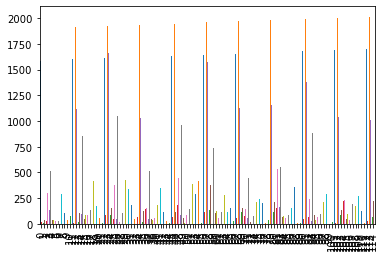

In [179]:
b.plot.bar(legend=None)

<AxesSubplot:>

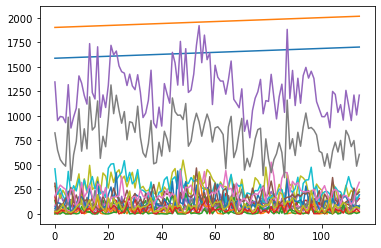

In [180]:
b.plot.line(legend=None)

<AxesSubplot:>

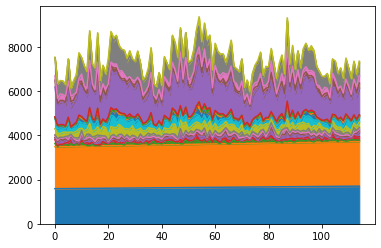

In [181]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

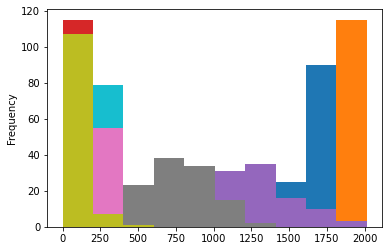

In [182]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='JUL'>

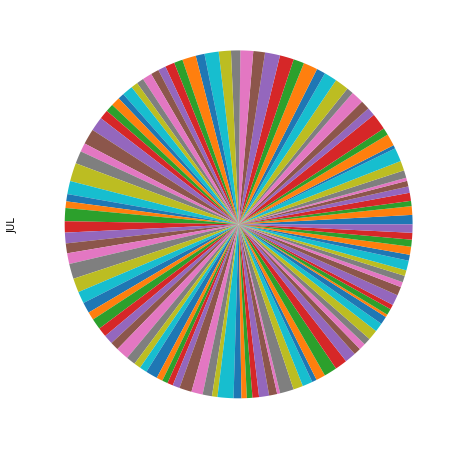

In [183]:
b.plot.pie(y='JUL',figsize=(8,8),labels=None,legend=None)

# DataSet 23

In [184]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book23.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1357,HARYANA DELHI & CHANDIGARH,1901,35.4,28.9,11.1,0.0,5.1,13.2,126.4,151.5,10.5,2.0,0.0,6.1,390.1,64.3,16.2,301.6,8.1
1,1358,HARYANA DELHI & CHANDIGARH,1902,0.0,0.7,2.9,10.2,15.8,74.6,149.3,97.1,59.8,9.3,0.0,0.0,419.8,0.7,28.9,380.9,9.3
2,1359,HARYANA DELHI & CHANDIGARH,1903,14.7,0.5,2.3,0.5,8.5,8.6,151.6,138.2,97.7,4.0,0.0,2.3,428.9,15.2,11.3,396.1,6.2
3,1360,HARYANA DELHI & CHANDIGARH,1904,7.6,0.7,48.0,0.5,29.3,34.3,109.7,162.9,102.3,1.5,10.4,20.3,527.8,8.3,77.8,409.3,32.3
4,1361,HARYANA DELHI & CHANDIGARH,1905,44.8,20.8,14.0,1.3,7.4,20.1,93.6,23.1,92.6,0.0,0.0,5.1,322.9,65.7,22.7,229.4,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1467,HARYANA DELHI & CHANDIGARH,2011,0.7,26.7,6.9,8.9,28.7,94.4,85.0,127.3,133.1,0.0,0.0,0.4,512.0,27.5,44.4,439.8,0.4
111,1468,HARYANA DELHI & CHANDIGARH,2012,8.2,0.2,0.1,11.8,3.8,5.3,68.1,196.6,90.7,2.4,0.6,3.5,391.4,8.4,15.8,360.7,6.5
112,1469,HARYANA DELHI & CHANDIGARH,2013,21.1,52.2,5.3,3.3,1.4,62.1,96.5,161.9,42.8,10.9,1.7,2.1,461.2,73.2,10.0,363.3,14.7
113,1470,HARYANA DELHI & CHANDIGARH,2014,13.0,17.3,26.8,7.5,20.3,25.9,72.3,34.8,67.3,10.5,0.2,9.6,305.5,30.3,54.6,200.2,20.3


In [185]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

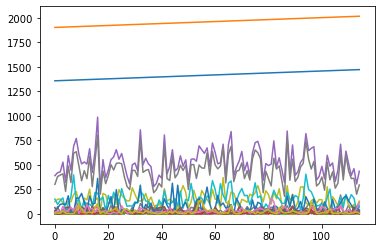

In [186]:
a.plot.line(legend=None)

<AxesSubplot:>

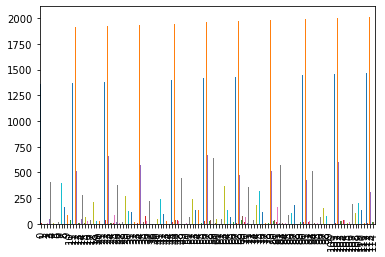

In [187]:
a.plot.bar(legend=None)

<AxesSubplot:>

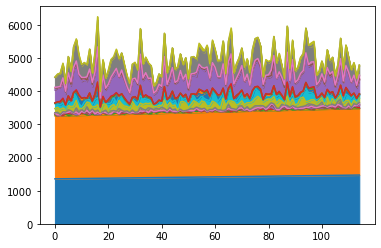

In [188]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

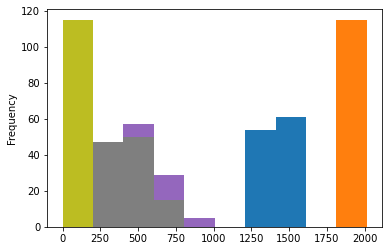

In [189]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAR'>

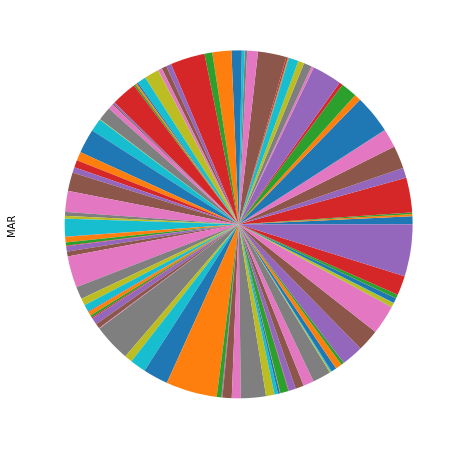

In [190]:
a.plot.pie(y='MAR',figsize=(8,8),labels=None,legend=None)

# DataSet 24

In [191]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book24.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1472,PUNJAB,1901,55.7,50.1,25.2,2.1,25.2,10.4,178.2,145.0,24.4,3.7,0.0,3.3,523.5,105.9,52.5,358.1,7.0
1,1473,PUNJAB,1902,0.0,0.8,9.9,10.9,29.6,49.9,125.6,94.9,67.2,9.0,0.0,0.1,398.0,0.8,50.4,337.7,9.1
2,1474,PUNJAB,1903,29.5,0.5,45.0,1.3,9.2,5.2,212.2,119.1,132.5,6.9,0.0,9.5,571.0,29.9,55.5,469.1,16.4
3,1475,PUNJAB,1904,24.2,1.7,87.8,1.2,13.8,22.0,59.9,124.0,73.8,7.4,9.8,25.9,451.5,25.9,102.9,279.7,43.1
4,1476,PUNJAB,1905,53.0,40.3,24.3,0.5,2.2,19.2,122.6,50.3,111.1,1.2,0.0,9.4,434.3,93.3,27.0,303.2,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1582,PUNJAB,2011,3.5,35.6,8.2,17.8,18.9,162.9,120.9,193.5,140.2,0.0,1.0,2.6,705.2,39.2,44.9,617.5,3.6
111,1583,PUNJAB,2012,62.6,3.2,1.9,31.1,1.6,11.9,120.2,135.1,112.3,2.2,0.4,11.0,493.6,65.8,34.7,379.6,13.6
112,1584,PUNJAB,2013,9.3,50.1,11.6,3.4,3.6,120.3,117.9,217.1,24.4,16.2,6.1,6.6,586.6,59.4,18.6,479.7,28.9
113,1585,PUNJAB,2014,21.8,20.1,30.3,24.5,20.8,20.6,76.3,41.9,105.8,6.0,0.7,14.1,382.7,41.9,75.5,244.6,20.7


In [192]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

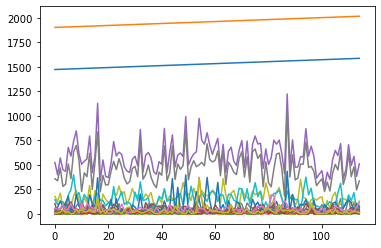

In [193]:
a.plot.line(legend=None)

<AxesSubplot:>

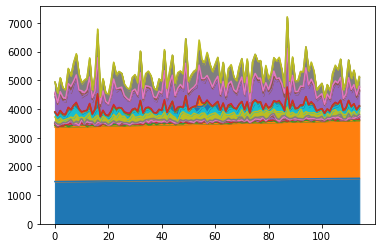

In [194]:
a.plot.area(legend=None)

<AxesSubplot:>

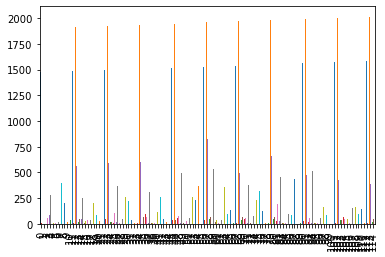

In [195]:
a.plot.bar(legend=None)

<AxesSubplot:ylabel='Frequency'>

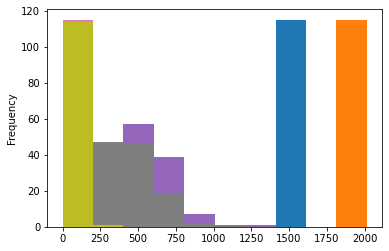

In [196]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='DEC'>

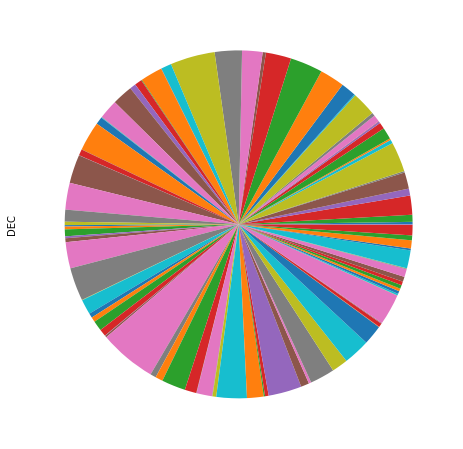

In [197]:
a.plot.pie(y='DEC',figsize=(8,8),labels=None,legend=None)